<h1 style="text-align: center;">Telangana Tourism Analysis</h1>


## Data Importing & Cleaning

**1. Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

**2. Importing data**

In [2]:
#importing data for domestic visitors
df_dv16 = pd.read_csv('domestic_visitors/domestic_visitors_2016.csv')
df_dv17 = pd.read_csv('domestic_visitors/domestic_visitors_2017.csv')
df_dv18 = pd.read_csv('domestic_visitors/domestic_visitors_2018.csv')
df_dv19 = pd.read_csv('domestic_visitors/domestic_visitors_2019.csv')

#importing data for foreign visitors
df_fv16 = pd.read_csv('foreign_visitors/foreign_visitors_2016.csv')
df_fv17 = pd.read_csv('foreign_visitors/foreign_visitors_2017.csv')
df_fv18 = pd.read_csv('foreign_visitors/foreign_visitors_2018.csv')
df_fv19 = pd.read_csv('foreign_visitors/foreign_visitors_2019.csv')

**3. Reading sample data**

In [3]:
df_dv18.sample(2)

,district,date,month,year,visitors
148,Mahbubnagar,01-05-2018,May,2018,193478
211,Nalgonda,01-08-2018,August,2018,10135


In [4]:
df_fv18.sample(2)

,district,date,month,year,visitors
0,Adilabad,01-01-2018,January,2018,0
66,Jayashankar Bhoopalpally,01-07-2018,July,2018,40


**4. Checking DataTypes & Null Values**

In [5]:
#checking rows and columns
print(df_dv16.shape, df_dv17.shape, df_dv18.shape, df_dv19.shape)
print(df_fv16.shape, df_fv17.shape, df_fv18.shape, df_fv19.shape)

(372, 5) (372, 5) (372, 5) (396, 5)
(372, 5) (372, 5) (372, 5) (396, 5)


In [6]:
#checking data types and null values
df_dv19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  396 non-null    object
 1   date      396 non-null    object
 2   month     396 non-null    object
 3   year      396 non-null    int64 
 4   visitors  378 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.6+ KB


*Values despite being empty are not null and just space & columns not in proper format*

**5. Handling Null/Blank Values & Changing Type**

In [7]:
#changing type and values of domestic data
df_dv16['visitors'] = df_dv16['visitors'].replace(' ',0)
df_dv16['visitors'] = df_dv16['visitors'].astype(int)
df_dv16['date'] = pd.to_datetime(df_dv16['date'])

df_dv17['visitors'] = df_dv17['visitors'].replace(' ',0)
df_dv17['visitors'] = df_dv17['visitors'].astype(int)
df_dv17['date'] = pd.to_datetime(df_dv17['date'])

df_dv18['visitors'] = df_dv18['visitors'].fillna(0)
df_dv18['visitors'] = df_dv18['visitors'].replace(' ',0)
df_dv18['visitors'] = df_dv18['visitors'].astype(int)
df_dv18['date'] = pd.to_datetime(df_dv18['date'])

df_dv19['visitors'] = df_dv19['visitors'].fillna(0)
df_dv19['visitors'] = df_dv19['visitors'].replace(' ',0)
df_dv19['visitors'] = df_dv19['visitors'].astype(int)
df_dv19['date'] = pd.to_datetime(df_dv19['date'])
df_dv19['district'] = df_dv19['district'].replace('Narayanapet','Narayanpet')

In [8]:
#changing type and values of foreign data
df_fv16['visitors'] = df_fv16['visitors'].replace(' ',0)
df_fv16['visitors'] = df_fv16['visitors'].astype(int)
df_fv16['date'] = pd.to_datetime(df_fv16['date'])

df_fv17['visitors'] = df_fv17['visitors'].replace(' ',0)
df_fv17['visitors'] = df_fv17['visitors'].astype(int)
df_fv17['date'] = pd.to_datetime(df_fv17['date'])

df_fv18['visitors'] = df_fv18['visitors'].replace(' ',0)
df_fv18['visitors'] = df_fv18['visitors'].astype(int)
df_fv18['date'] = pd.to_datetime(df_fv18['date'])

df_fv19['visitors'] = df_fv19['visitors'].replace(' ',0)
df_fv19['visitors'] = df_fv19['visitors'].astype(int)
df_fv19['date'] = pd.to_datetime(df_fv19['date'])

**6. Merging DataFrames**

In [9]:
#merging domestic & foreign data for each year
df_2016 = pd.merge(df_dv16, df_fv16, on=['district','date','month','year'], suffixes=('_domestic','_foreign'),how='outer')
df_2017 = pd.merge(df_dv17, df_fv17, on=['district','date','month','year'], suffixes=('_domestic','_foreign'),how='outer')
df_2018 = pd.merge(df_dv18, df_fv18, on=['district','date','month','year'], suffixes=('_domestic','_foreign'),how='outer')
df_2019 = pd.merge(df_dv19, df_fv19, on=['district','date','month','year'], suffixes=('_domestic','_foreign'),how='outer')

In [10]:
#merging data of all years
df_merged = (df_2016.merge(df_2017, on=['district','month'],how='outer',suffixes=('_16','_17'))
            .merge(df_2018, on=['district','month'],how='outer',suffixes=('_17','_18'))
            .merge(df_2019, on=['district','month'],how='outer',suffixes=('_18','_19')))

#rearranging columns
df_all = df_merged[['district','month','visitors_domestic_16','visitors_foreign_16',
                    'visitors_domestic_17','visitors_foreign_17',
                    'visitors_domestic_18','visitors_foreign_18',
                    'visitors_domestic_19','visitors_foreign_19']]
df_all.head(2)

,district,month,visitors_domestic_16,visitors_foreign_16,visitors_domestic_17,visitors_foreign_17,visitors_domestic_18,visitors_foreign_18,visitors_domestic_19,visitors_foreign_19
0,Adilabad,January,792136.0,2.0,318799.0,5.0,320356.0,0.0,25071,0
1,Adilabad,February,937820.0,0.0,83316.0,0.0,36550.0,0.0,406177,2


## Data Analysis

**1. List down the top 10 districts that have the highest number of domestic visitors overall (2016 - 2019)?**

In [11]:
#turning NaN to 0 for calculations
df_all = df_all.fillna(0)

#calculating total domestic & foreign visitors
df_all['total_domestic'] = df_all['visitors_domestic_16']+df_all['visitors_domestic_17']+df_all['visitors_domestic_18']+df_all['visitors_domestic_19']
df_all['total_foreign'] = df_all['visitors_foreign_16']+df_all['visitors_foreign_17']+df_all['visitors_foreign_18']+df_all['visitors_foreign_19']

In [12]:
#top 10
df_dv10 = df_all.groupby('district')['total_domestic'].sum().sort_values(ascending=False).head(10)
df_dv10

district
Hyderabad                   83900960.0
Rajanna Sircilla            41763276.0
Warangal (Urban)            30726603.0
Yadadri Bhongir             26893080.0
Bhadradri Kothagudem        21600962.0
Medak                       20542639.0
Jayashankar Bhoopalpally    19632865.0
Mahbubnagar                 17180118.0
Nirmal                      13315796.0
Jagtial                     11303514.0
Name: total_domestic, dtype: float64

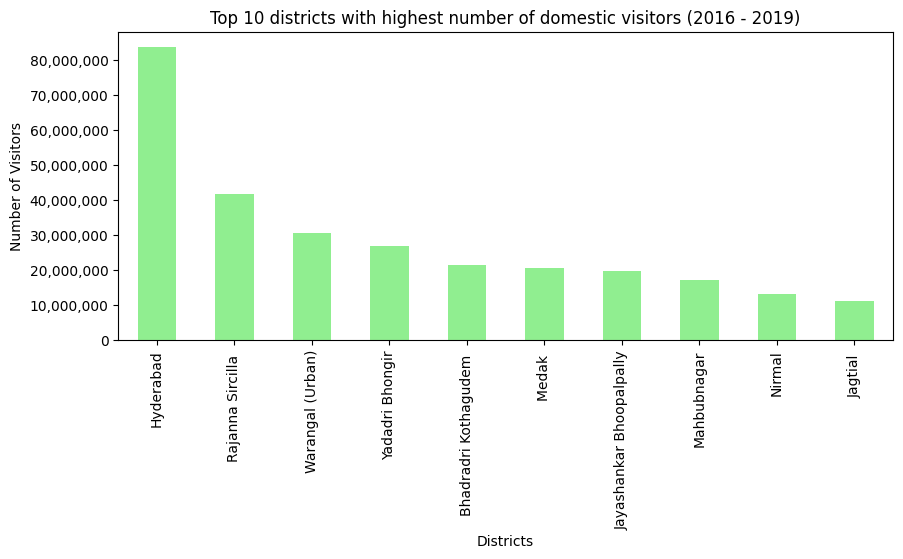

In [13]:
#plotting
def format_y_ticks(value, tick_number):
    return f'{value:,.0f}'

fig, ax = plt.subplots(figsize=(10,4))
df_dv10.plot(kind='bar', color='lightgreen',ax=ax)

ax.set_title('Top 10 districts with highest number of domestic visitors (2016 - 2019)')
ax.set_ylabel('Number of Visitors')
ax.set_xlabel('Districts')
ax.yaxis.set_major_formatter(FuncFormatter(format_y_ticks))

plt.show()

**Creating a choropleth map to show domestic visitors of every district**

In [14]:
#importing shape file
shp_telangana = gpd.read_file('shape/TS_District_Boundary_33_FINAL.shp')

#grouping and matching data for merging
dv_dist = df_all.groupby('district')['total_domestic'].sum().reset_index()
dv_dist['district'] = dv_dist['district'].str.strip()
dv_dist['district'].replace({'Jayashankar Bhoopalpally':'Jayashankar Bhupalpally',
                             'Komaram Bheem Asifabad':'Kumurambheem Asifabad',
                             'Jangaon':'Jangoan',
                             'Medchal':'Medchal_Malkajgiri',
                             'Ranga Reddy':'Rangareddy',
                             'Mahbubnagar':'Mahabubnagar',
                             'Warangal (Rural)':'Warangal',
                             'Warangal (Urban)':'Warangal',
                             'Yadadri Bhongir':'Yadadri Bhuvanagiri'}, inplace=True)

#merging shape df & data df
df_shape = shp_telangana.merge(dv_dist, left_on='DISTRICT_N', right_on='district', how='outer')

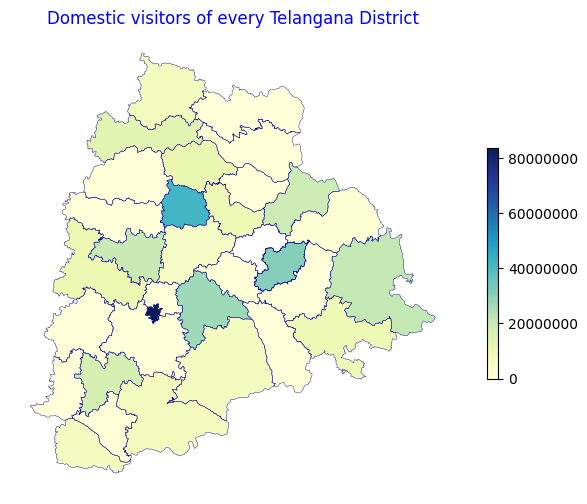

In [15]:
#chaniging df type to gdf
df_shape = gpd.GeoDataFrame(df_shape)

#Plotting choropleth map
ax = df_shape.boundary.plot(edgecolor='darkblue', linewidth = 0.3, figsize=(8,6))

df_shape.plot(ax=ax, column='total_domestic', cmap='YlGnBu',
            legend=True, legend_kwds={'shrink':0.5, 'format': '%.0f'} )

#removing axis and setting title
ax.axis('off')
ax.set_title('Domestic visitors of every Telangana District', size=12, color='blue')

plt.show()

**2. List down the top 3 districts based on compounded annual growth rate (CAGR) of visitors between (2016 - 2019)?**

In [16]:
#creating df to calculate CAGR
df_cagr = df_all.groupby('district')[['visitors_domestic_16','visitors_foreign_16',
                                      'visitors_domestic_19','visitors_foreign_19']].sum()
df_cagr['total_visitors16'] = df_cagr['visitors_domestic_16']+df_cagr['visitors_foreign_16']
df_cagr['total_visitors19'] = df_cagr['visitors_domestic_19']+df_cagr['visitors_foreign_19']

#replacing 0 with NaN so division by 0 doesnt happen
df_cagr['total_visitors16'] = df_cagr['total_visitors16'].replace(0, np.nan)

In [17]:
#top 3 by CAGR
cagr = ((df_cagr['total_visitors19']/df_cagr['total_visitors16'])**(1/3)-1)*100
df_cagr3 = round(cagr.sort_values(ascending=False),2).head(3)
df_cagr3

district
Mancherial               225.80
Warangal (Rural)         163.15
Bhadradri Kothagudem     143.39
dtype: float64

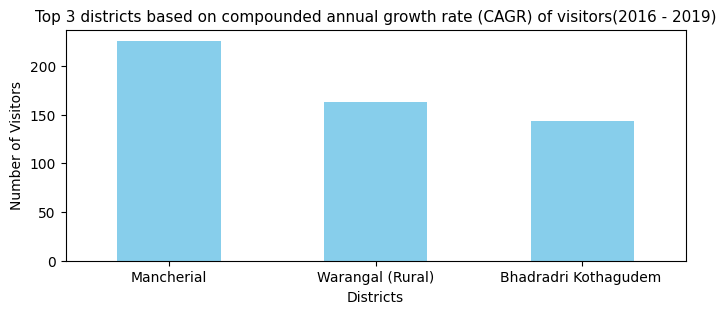

In [18]:
#plotting
fig, ax = plt.subplots(figsize=(8,3))
df_cagr3.plot(kind='bar', color='skyblue',ax=ax)

ax.set_title('Top 3 districts based on compounded annual growth rate (CAGR) of visitors(2016 - 2019)', size=11)
ax.set_ylabel('Number of Visitors')
ax.set_xlabel('Districts')
plt.xticks(rotation=0)

plt.show()

**3. List down the bottom 3 districts based on compounded annual growth rate (CAGR) of visitors between (2016 - 2019)?**


In [19]:
#bottom 3 by CAGR
df_cagrb3 = round(cagr.sort_values(ascending=True),2).dropna().head(3)
df_cagrb3

district
Karimnagar         -79.63
Nalgonda           -71.13
Warangal (Urban)   -58.85
dtype: float64

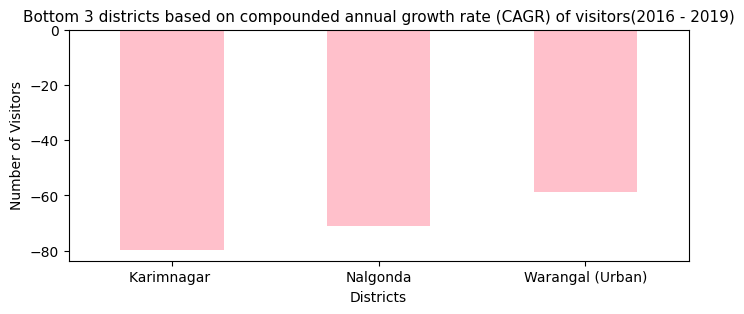

In [20]:
#plotting
fig, ax = plt.subplots(figsize=(8,3))
df_cagrb3.plot(kind='bar', color='pink',ax=ax)

ax.set_title('Bottom 3 districts based on compounded annual growth rate (CAGR) of visitors(2016 - 2019)', size=11)
ax.set_ylabel('Number of Visitors')
ax.set_xlabel('Districts')
plt.xticks(rotation=0)

plt.show()

**4. What are the peak and low season months for Hyderabad based on the data from 2016 to 2019 for Hyderabad district?**

In [21]:
#calculating total visitors
df_all['total_visitors'] = df_all['total_domestic']+df_all['total_foreign']

In [22]:
#filtering Hyderabad data
df_hyd = df_all[df_all['district']=='Hyderabad']

#total visitors count in each month across 4 years
hyd_tv = df_hyd[['month','total_visitors']].sort_values(by='total_visitors',ascending=False)
#domestic visitors count in each month across 4 years
hyd_dv = df_hyd[['month','total_domestic']].sort_values(by='total_domestic',ascending=False)
#foreign visitors count in each month across 4 years
hyd_fv = df_hyd[['month','total_foreign']].sort_values(by='total_foreign',ascending=False)
#combining all 3
hyd_av = pd.merge(hyd_tv,hyd_dv, on='month').merge(hyd_fv, on='month')

#define the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

#convert the 'month' column to a categorical type with the specified order
hyd_av['month'] = pd.Categorical(hyd_av['month'], categories=month_order, ordered=True)
hyd_av = hyd_av.sort_values('month')
hyd_av

,month,total_visitors,total_domestic,total_foreign
3,January,6558551.0,6452101.0,106450.0
11,February,5118208.0,5014430.0,103778.0
10,March,5303984.0,5227626.0,76358.0
4,April,6187334.0,6126839.0,60495.0
5,May,6109590.0,6049214.0,60376.0
0,June,16965307.0,16897783.0,67524.0
8,July,5633143.0,5552527.0,80616.0
6,August,5834736.0,5750967.0,83769.0
9,September,5406363.0,5312283.0,94080.0
2,October,6650351.0,6552397.0,97954.0


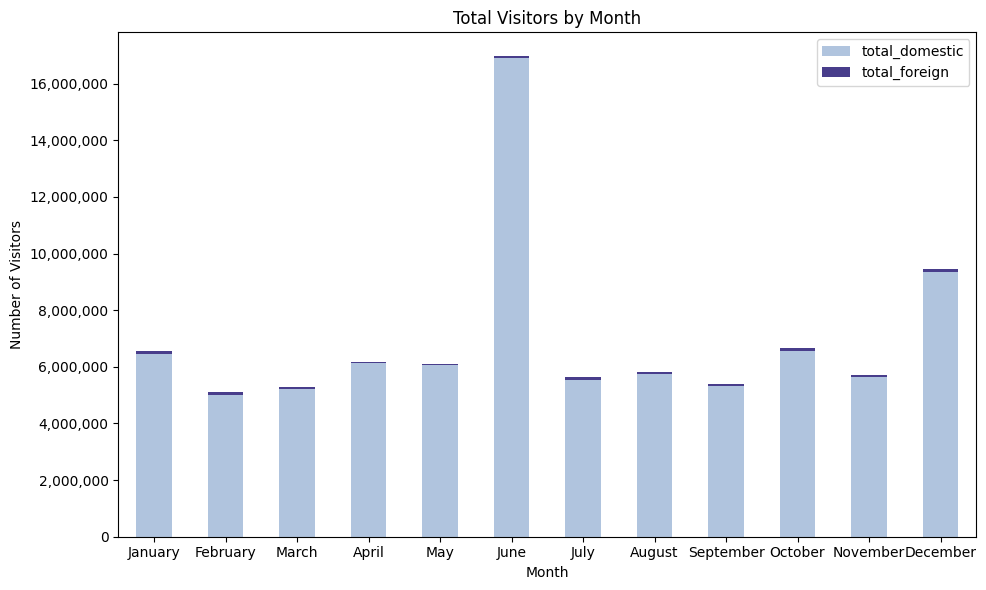

In [23]:
#plotting
def format_y_ticks(value, tick_number):
    return f'{value:,.0f}'
    
fig, ax = plt.subplots(figsize=(10, 6))
hyd_av.plot(kind='bar',stacked=True, x='month', y=['total_domestic', 'total_foreign'], ax=ax, color=['lightsteelblue', 'darkslateblue'])

ax.set_title('Total Visitors by Month')
ax.set_ylabel('Number of Visitors')
ax.set_xlabel('Month')
ax.yaxis.set_major_formatter(FuncFormatter(format_y_ticks))

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**5. Show the top & bottom 3 districts with high domestic to foreign tourist ratio?**

In [24]:
#grouping domestic & foreign visitors by district
df_d2fr = df_all.groupby('district')[['total_domestic','total_foreign']].sum()

#calculating domestic to foreign tourist ratio
df_d2fr['domestic_to_foreign_ratio'] = df_d2fr['total_domestic']/df_d2fr['total_foreign']

#handling inf values and replacing null with 0
df_d2fr['domestic_to_foreign_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_d2fr['domestic_to_foreign_ratio'].fillna(0, inplace=True)

#formating numbers in scientific notation to string then converting it to float for sorting
df_d2fr['domestic_to_foreign_ratio'] = df_d2fr['domestic_to_foreign_ratio'].apply(lambda x: f"{x:.2f}")
df_d2fr['domestic_to_foreign_ratio'] = df_d2fr['domestic_to_foreign_ratio'].astype(float)

In [25]:
#top 3 
dtfr_t3 = df_d2fr.sort_values(by='domestic_to_foreign_ratio', ascending=False).head(3).reset_index()
dtfr_t3

,district,total_domestic,total_foreign,domestic_to_foreign_ratio
0,Nirmal,13315796.0,2.0,6657898.00
1,Jangaon,826280.0,2.0,413140.00
2,Adilabad,7321575.0,32.0,228799.22


In [26]:
#bottom 3
dtfr_b3 = df_d2fr[df_d2fr['domestic_to_foreign_ratio']!=0].sort_values(by='domestic_to_foreign_ratio', ascending=True).head(3).reset_index()
dtfr_b3

,district,total_domestic,total_foreign,domestic_to_foreign_ratio
0,Hyderabad,83900960.0,1044898.0,80.30
1,Warangal (Rural),819162.0,306.0,2677.00
2,Mulugu,1819800.0,575.0,3164.87


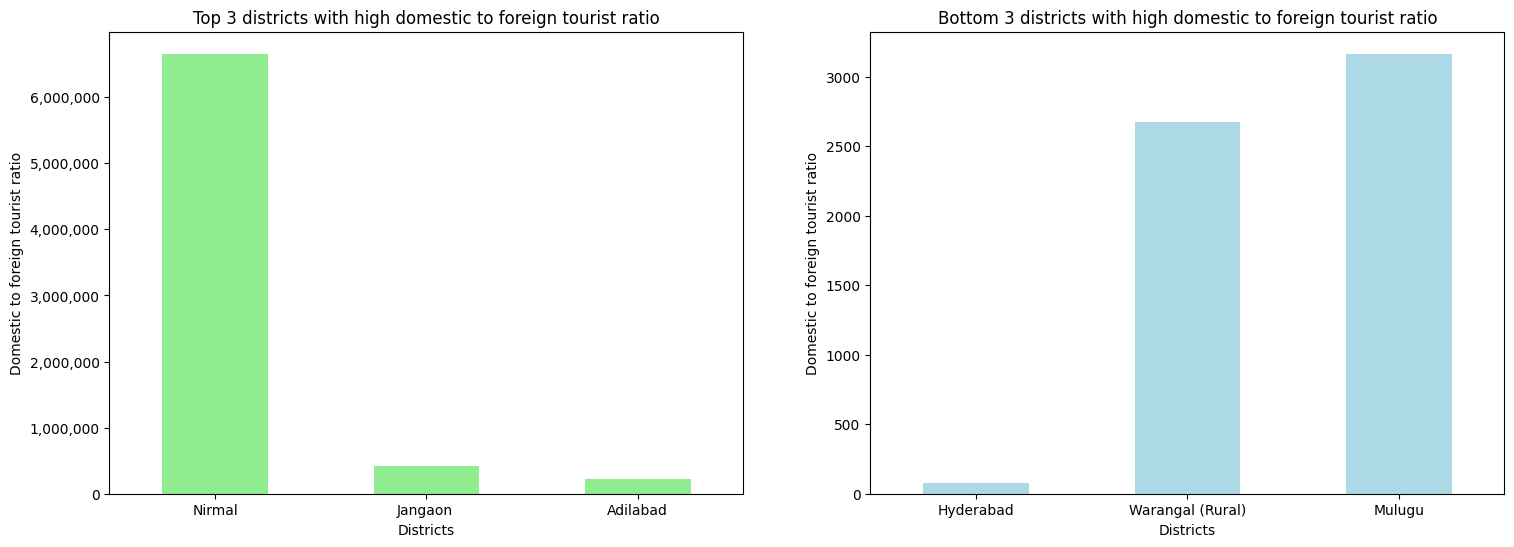

In [27]:
#plotting
def format_y_ticks(value, tick_number):
    return f'{value:,.0f}'
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

dtfr_t3.plot(kind='bar', x='district', y='domestic_to_foreign_ratio', color='lightgreen', ax=axes[0], legend=False)
dtfr_b3.plot(kind='bar', x='district', y='domestic_to_foreign_ratio', color='lightblue', ax=axes[1], legend=False)

axes[0].set_title('Top 3 districts with high domestic to foreign tourist ratio')
axes[0].set_ylabel('Domestic to foreign tourist ratio')
axes[0].set_xlabel('Districts')
axes[0].yaxis.set_major_formatter(FuncFormatter(format_y_ticks))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

axes[1].set_title('Bottom 3 districts with high domestic to foreign tourist ratio')
axes[1].set_ylabel('Domestic to foreign tourist ratio')
axes[1].set_xlabel('Districts')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.show()

**6. List the top & bottom 5 districts based on ‘population to tourist footfall ratio in 2019?**

In [28]:
#calculating total visitors in 2019 per district
df_tv = df_all.groupby('district')[['visitors_domestic_19','visitors_foreign_19']].sum().reset_index()
df_tv['total_visitors19'] = df_tv['visitors_domestic_19']+df_tv['visitors_foreign_19']

#importing census data of 2011 for telangana districts
pop_2011 = pd.read_csv('telangana_2011.csv')

In [29]:
#merging both dfs
df_ffr = pd.merge(df_tv, pop_2011, on='district', how='outer')

#calculating population to tourist footfall ratio
df_ffr['pop_to_tourist_footfall_ratio'] = df_ffr['total_visitors19']/df_ffr['population']

In [30]:
#top 5
ffr_t5 = df_ffr.sort_values(by='pop_to_tourist_footfall_ratio', ascending=False).head(5)
ffr_t5

,district,visitors_domestic_19,visitors_foreign_19,total_visitors19,population,pop_to_tourist_footfall_ratio
23,Rajanna Sircilla,16832897,0,16832897,552037,30.492335
1,Bhadradri Kothagudem,12817737,0,12817737,1069261,11.987473
14,Medak,5452570,0,5452570,767428,7.104992
16,Mulugu,1819800,575,1820375,257744,7.062725
32,Yadadri Bhongir,4489374,0,4489374,739448,6.071250


In [31]:
#Bottom 5
ffr_b5 = df_ffr.sort_values(by='pop_to_tourist_footfall_ratio', ascending=True).head(5)
ffr_b5

,district,visitors_domestic_19,visitors_foreign_19,total_visitors19,population,pop_to_tourist_footfall_ratio
27,Suryapet,0,0,0,1099560,0.000000
24,Ranga Reddy,0,0,0,2446265,0.000000
28,Vikarabad,0,0,0,927140,0.000000
15,Medchal,0,0,0,2440073,0.000000
7,Kamareddy,534,0,534,972625,0.000549


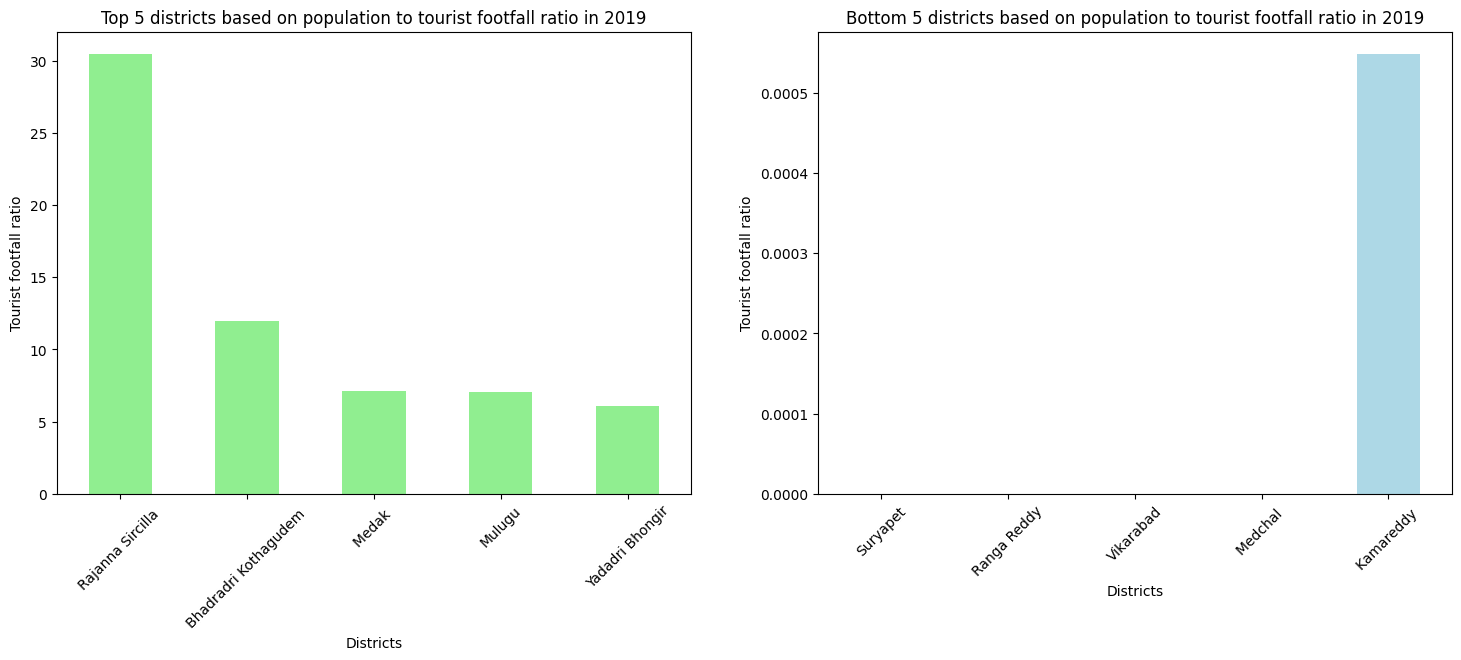

In [32]:
#plotting
def format_y_ticks(value, tick_number):
    return f'{value:,.0f}'
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

ffr_t5.plot(kind='bar', x='district', y='pop_to_tourist_footfall_ratio', color='lightgreen', ax=axes[0], legend=False)
ffr_b5.plot(kind='bar', x='district', y='pop_to_tourist_footfall_ratio', color='lightblue', ax=axes[1], legend=False)

axes[0].set_title('Top 5 districts based on population to tourist footfall ratio in 2019')
axes[0].set_ylabel('Tourist footfall ratio')
axes[0].set_xlabel('Districts')
axes[0].yaxis.set_major_formatter(FuncFormatter(format_y_ticks))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

axes[1].set_title('Bottom 5 districts based on population to tourist footfall ratio in 2019')
axes[1].set_ylabel('Tourist footfall ratio')
axes[1].set_xlabel('Districts')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.show()

**7. What will be the projected number of domestic and foreign tourists in Hyderabad in 2025 based on the growth rate from previous years?**

In [33]:
#appending all years dfs
df_append = pd.concat([df_2016,df_2017,df_2018,df_2019],axis=0)
df_append['total_visitors'] = df_append['visitors_domestic']+df_append['visitors_foreign']

#filtering data for Hyderabad
df_append_hyd = df_append[df_append['district']=='Hyderabad']

#grouping tourists by year
df_append_hyd = df_append_hyd.groupby('year')[['visitors_domestic','visitors_foreign']].sum().reset_index()
df_append_hyd

,year,visitors_domestic,visitors_foreign
0,2016,23394705,163631
1,2017,27160242,247179
2,2018,19543651,314788
3,2019,13802362,319300


In [34]:
#using regression to predict domestic tourists growth in Hyderabad in 2025
X = df_append_hyd['year'].values.reshape(-1, 1)
y = df_append_hyd['visitors_domestic'].values

model1 = LinearRegression()
model1.fit(X, y)

year_to_predict = np.array([[2025]])
predicted_domestic_visitors = model1.predict(year_to_predict)
print(f'Projected number of domestic tourists in Hyderabad 2025: {predicted_domestic_visitors[0]}')

Projected number of domestic tourists in Hyderabad 2025: -6319975.0


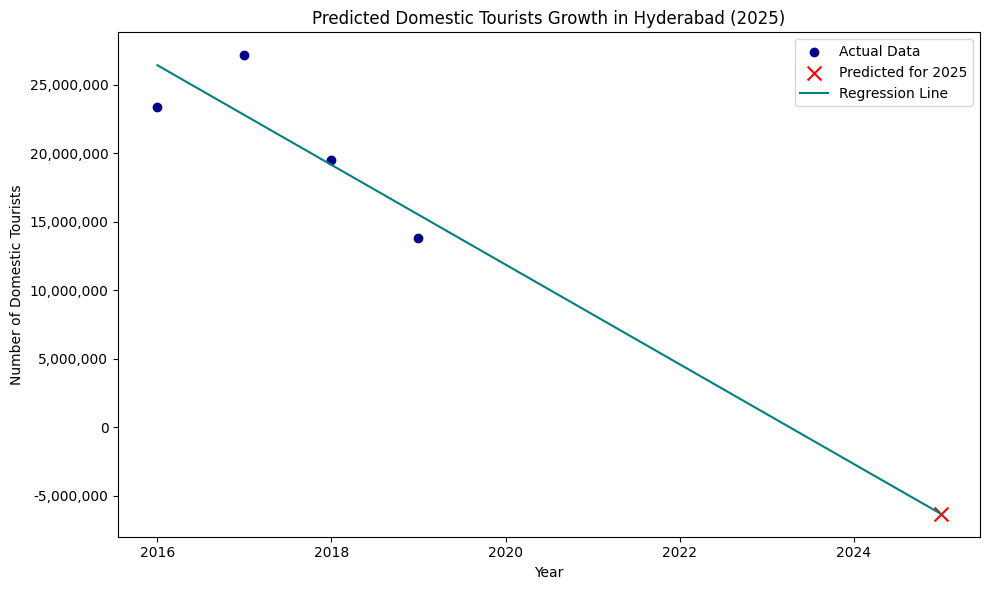

Projected number of domestic tourists in Hyderabad 2025: -6319975.0


In [35]:
#plotting
def format_y_ticks(value, tick_number):
    return f'{value:,.0f}'
    
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='darkblue', label='Actual Data')
plt.scatter(year_to_predict, predicted_domestic_visitors, color='red', marker='x', s=100, label='Predicted for 2025')
X_range = np.arange(min(X), year_to_predict[0,0]+1).reshape(-1, 1)
plt.plot(X_range, model1.predict(X_range), color='teal', label='Regression Line')

plt.xlabel('Year')
plt.ylabel('Number of Domestic Tourists')
plt.title('Predicted Domestic Tourists Growth in Hyderabad (2025)')
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))

plt.tight_layout()
plt.show()
print(f'Projected number of domestic tourists in Hyderabad 2025: {predicted_domestic_visitors[0]}')

In [36]:
#using regression to predict foreign tourists growth in Hyderabad in 2025
A = df_append_hyd['year'].values.reshape(-1, 1)
b = df_append_hyd['visitors_foreign'].values

model2 = LinearRegression()
model2.fit(A, b)

year_to_predict = np.array([[2025]])
predicted_foreign_visitors = model2.predict(year_to_predict)
print(f'Projected number of foreign tourists in Hyderabad 2025: {predicted_foreign_visitors[0]}')

Projected number of foreign tourists in Hyderabad 2025: 662186.5


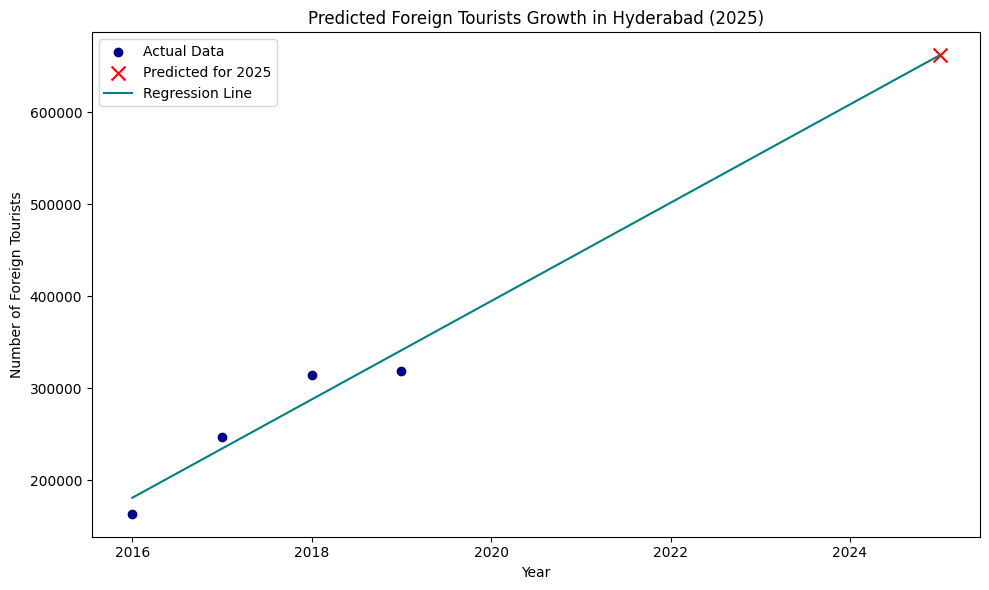

Projected number of foreign tourists in Hyderabad 2025: 662186.5


In [37]:
#plotting
plt.figure(figsize=(10, 6))

plt.scatter(A, b, color='darkblue', label='Actual Data')
plt.scatter(year_to_predict, predicted_foreign_visitors, color='red', marker='x', s=100, label='Predicted for 2025')
X_range = np.arange(min(X), year_to_predict[0,0]+1).reshape(-1, 1)
plt.plot(X_range, model2.predict(X_range), color='teal', label='Regression Line')

plt.xlabel('Year')
plt.ylabel('Number of Foreign Tourists')
plt.title('Predicted Foreign Tourists Growth in Hyderabad (2025)')
plt.legend()

plt.tight_layout()
plt.show()
print(f'Projected number of foreign tourists in Hyderabad 2025: {predicted_foreign_visitors[0]}')

**8. Estimate the projected revenue for Hyderabad in 2025 based on average spend per tourist?**

In [38]:
#creating df of average spending by visitors
tourist = ['domestic', 'foreign']
avg_rev = [1200, 5600]
visitors_2025 = [predicted_domestic_visitors.item(), predicted_foreign_visitors.item()]

avg_spend = pd.DataFrame({'tourist':tourist, 'avg_rev':avg_rev, 'visitors_2025':visitors_2025})

#calculating  projected revenue for Hyderabad in 2025
avg_spend['predicted_rev'] = avg_spend['avg_rev']*avg_spend['visitors_2025']
#turning to scientific numbers to normal digits
avg_spend['predicted_revenue'] = avg_spend['predicted_rev'].apply(lambda x: f"{x}")

avg_spent = avg_spend[['tourist','predicted_revenue']]

print(avg_spent)
print('Domestic Revenue cannot be less than 0 unless it is predicting for a loss')

    tourist predicted_revenue
0  domestic     -7583970000.0
1   foreign      3708244400.0
Domestic Revenue cannot be less than 0 unless it is predicting for a loss


In [39]:
#pivoting avg_spend
avg_spent = avg_spent.T
avg_spent.columns = avg_spent.iloc[0]
avg_spent = avg_spent[1:]
avg_spent.insert(0, 'year', 2025)
avg_spent = avg_spent.reset_index(drop=True)

#concatinating data from 2016-2025 for revenue generated
df_concat = pd.concat([df_2016, df_2017, df_2018, df_2019])
df_concat = df_concat[df_concat['district']=='Hyderabad']
df_concat2 = df_concat.groupby('year')[['visitors_domestic','visitors_foreign']].sum().reset_index()
df_concat2.insert(2,'d_spend', 1200)
df_concat2.insert(4,'f_spend', 5600)

df_concat2['domestic'] = df_concat2['visitors_domestic']*df_concat2['d_spend']
df_concat2['foreign'] = df_concat2['visitors_foreign']*df_concat2['f_spend']

avg_spent_all = df_concat2[['year', 'domestic', 'foreign']]

avg_spend_all = pd.concat([avg_spent_all, avg_spent])
avg_spend_all

,year,domestic,foreign
0,2016,28073646000,916333600
1,2017,32592290400,1384202400
2,2018,23452381200,1762812800
3,2019,16562834400,1788080000
0,2025,-7583970000.0,3708244400.0


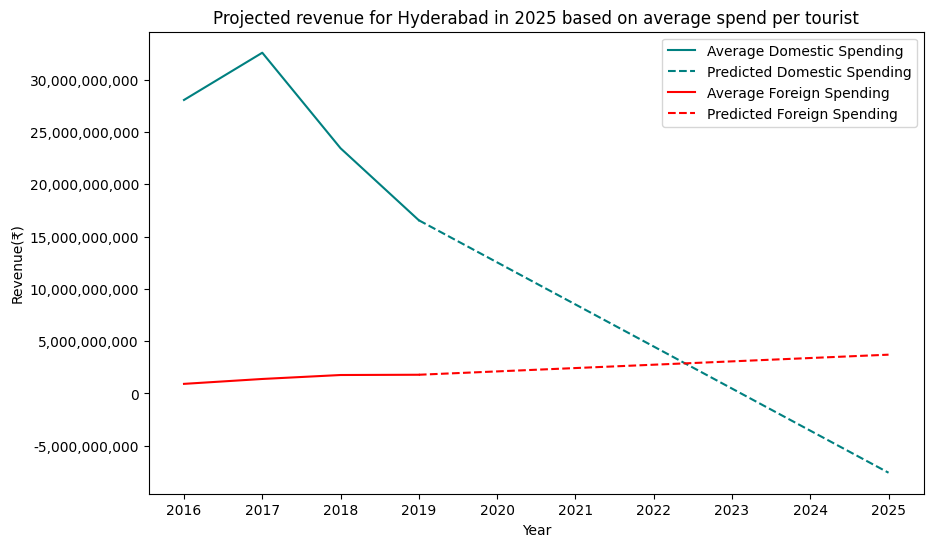

In [40]:
#plotting
def format_y_ticks(value, tick_number):
    return f'{value:,.0f}'

plt.figure(figsize=(10, 6))

smooth_years = avg_spend_all[avg_spend_all['year'] <= 2019]
dotted_years = avg_spend_all[avg_spend_all['year'] > 2018]

# Plot smooth line for domestic spending
plt.plot(smooth_years['year'], smooth_years['domestic'], color='teal', linestyle='-', label='Average Domestic Spending')
# Plot dotted line for domestic spending
plt.plot(dotted_years['year'], dotted_years['domestic'], color='teal', linestyle='--', label='Predicted Domestic Spending')

# Plot smooth line for foreign spending
plt.plot(smooth_years['year'], smooth_years['foreign'], color='red', linestyle='-', label='Average Foreign Spending')
# Plot dotted line for foreign spending
plt.plot(dotted_years['year'], dotted_years['foreign'], color='red', linestyle='--', label='Predicted Foreign Spending')

plt.title('Projected revenue for Hyderabad in 2025 based on average spend per tourist')
plt.xlabel('Year')
plt.ylabel('Revenue(₹)')
plt.legend()
plt.xticks(ticks=range(2016, 2026))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))

plt.show()

**9. Districts with highest potential?**

In [41]:
#grouping by districts, year
df_append2 = df_append.groupby(['district','year'])['total_visitors'].sum().reset_index()

#using CAGR to identify top4 districts with most growth potential
top4_cagr = cagr.sort_values(ascending=False).head(4).index
top4_cagr

Index(['Mancherial', 'Warangal (Rural)', 'Bhadradri Kothagudem ', 'Siddipet'], dtype='object', name='district')

In [42]:
#top4 districts with most growth potential by CAGR
growth_potential_cagr = df_append2[df_append2['district'].isin(top4_cagr)]
df_gp = growth_potential_cagr.sort_values(by=['district','total_visitors','year'], ascending=[True,False,False])
df_gp

,district,year,total_visitors
7,Bhadradri Kothagudem,2019,12817737
5,Bhadradri Kothagudem,2017,4094317
6,Bhadradri Kothagudem,2018,3799878
4,Bhadradri Kothagudem,2016,889030
54,Mancherial,2018,398004
55,Mancherial,2019,269820
53,Mancherial,2017,191626
52,Mancherial,2016,7802
101,Siddipet,2019,2987864
100,Siddipet,2018,1283300


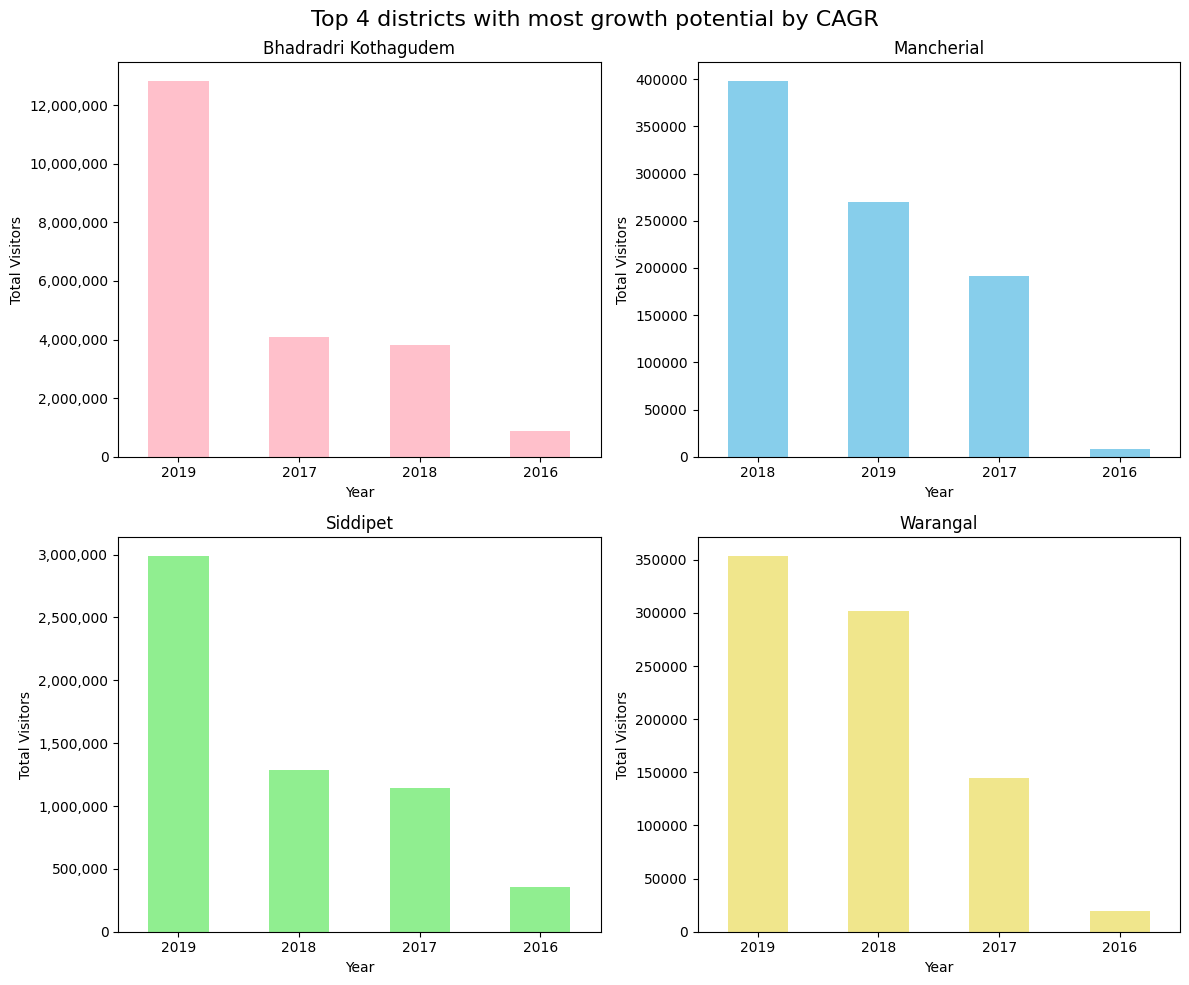

In [43]:
#plotting
bhadradri_kothagudem = df_gp[df_gp['district'] == 'Bhadradri Kothagudem ']
mancherial = df_gp[df_gp['district'] == 'Mancherial']
siddipet = df_gp[df_gp['district'] == 'Siddipet']
warangal = df_gp[df_gp['district'] == 'Warangal (Rural)']

def format_y_ticks(value, tick_number):
    return f'{value:,.0f}'

fig, axes = plt.subplots(2,2,figsize=(12, 10))

#plotting each district's data on its corresponding subplot
bhadradri_kothagudem.plot(kind='bar', x='year', y='total_visitors', ax=axes[0, 0], color='pink', legend=False)
axes[0, 0].set_title('Bhadradri Kothagudem')
axes[0, 0].set_ylabel('Total Visitors')
axes[0, 0].set_xlabel('Year')
axes[0, 0].yaxis.set_major_formatter(FuncFormatter(format_y_ticks))
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

mancherial.plot(kind='bar', x='year', y='total_visitors', ax=axes[0, 1], color='skyblue', title='Mancherial', legend=False)
axes[0, 1].set_title('Mancherial')
axes[0, 1].set_ylabel('Total Visitors')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

siddipet.plot(kind='bar', x='year', y='total_visitors', ax=axes[1, 0], color='lightgreen', title='Siddipet', legend=False)
axes[1, 0].set_title('Siddipet')
axes[1, 0].set_ylabel('Total Visitors')
axes[1, 0].set_xlabel('Year')
axes[1, 0].yaxis.set_major_formatter(FuncFormatter(format_y_ticks))
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

warangal.plot(kind='bar', x='year', y='total_visitors', ax=axes[1, 1], color='khaki', title='Warangal (Rural)', legend=False)
axes[1, 1].set_title('Warangal')
axes[1, 1].set_ylabel('Total Visitors')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

fig.suptitle('Top 4 districts with most growth potential by CAGR', fontsize=16)
plt.tight_layout()
plt.show()

**10. Is there any correlation between visitors count and festival months?**

In [44]:
#calculating all visitors in each month
month_visitors = df_all.groupby('month')['total_visitors'].sum().reset_index()

#importing data of major telangana festival months
festivals = pd.read_csv('festivals.csv')
festivals.head(2)

,sno,festivals,month
0,1,Bathukamma Festival,September
1,1,Bathukamma Festival,October


In [45]:
#counting number of festivals in each month
festivals_cnt = festivals['month'].value_counts().reset_index()
festivals_cnt.head(2)

,month,count
0,February,6
1,October,4


In [46]:
#merging two dfs to perform correlation
corr_data = pd.merge(month_visitors, festivals_cnt, on='month', how='left').replace(np.nan,0)
corr_data

,month,total_visitors,count
0,April,24016874.0,2.0
1,August,22397805.0,2.0
2,December,29951462.0,1.0
3,February,58180996.0,6.0
4,January,41490735.0,4.0
5,July,19254597.0,1.0
6,June,43206139.0,0.0
7,March,28817880.0,2.0
8,May,22942333.0,1.0
9,November,23643367.0,3.0


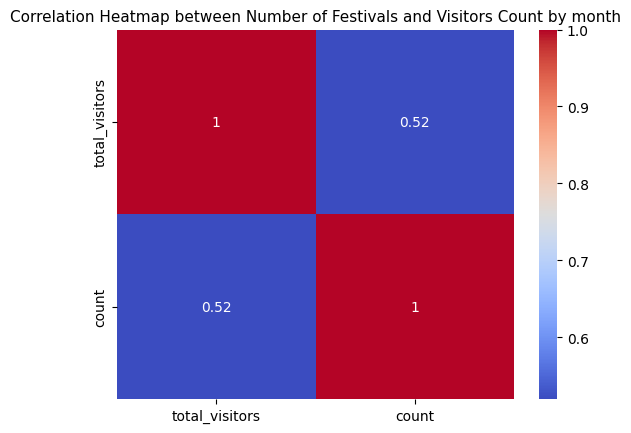

There is moderately positive correlation of 0.52


In [47]:
#plotting
sb.heatmap(corr_data[['total_visitors','count']].corr(), annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap between Number of Festivals and Visitors Count by month', size=11)
plt.show()

corr = round(corr_data['total_visitors'].corr(corr_data['count']),2)
print(f'There is moderately positive correlation of {corr}')

**11. Competition Analysis (2019-2021)**

In [48]:
#importing data of tourist visits in all states between 2019-2021
other_states = pd.read_csv('other_states.csv')

#creating more columns
other_states['2019_all'] = other_states['2019_dv']+other_states['2019_fv']
other_states['2020_all'] = other_states['2020_dv']+other_states['2020_fv']
other_states['2021_all'] = other_states['2021_dv']+other_states['2021_fv']
other_states['total_domestic'] = other_states['2019_dv']+other_states['2020_dv']+other_states['2021_dv']
other_states['total_foreign'] = other_states['2019_fv']+other_states['2020_fv']+other_states['2021_fv']
other_states['total'] = other_states['2019_all']+other_states['2020_all']+other_states['2021_all']
other_states.head(3)

,sno,state,2019_dv,2019_fv,2020_dv,2020_fv,2021_dv,2021_fv,2019_all,2020_all,2021_all,total_domestic,total_foreign,total
0,1,Andaman and Nicobar Islands,505398,16206,191207,5412,126238,1687,521604,196619,127925,822843,23305,846148
1,2,Andhra Pradesh,237051508,280356,70828590,67591,93277569,27551,237331864,70896181,93305120,401157667,375498,401533165
2,3,Arunachal Pradesh,555639,7825,42871,961,102915,182,563464,43832,103097,701425,8968,710393


**(i) What is Telangana's Rank based on most number of visitors?**

In [49]:
#ranking states based on most number of visitors
other_states['rank'] = other_states['total'].rank(ascending=False)
all_rank = other_states[['state','total','rank']].sort_values(by='rank').head(10)
all_rank

,state,total,rank
30,Tamil Nadu,759005489,1.0
33,Uttar Pradesh,737366740,2.0
1,Andhra Pradesh,401533165,3.0
16,Karnataka,387568278,4.0
20,Maharashtra,239075288,5.0
32,Telangana,155409452,6.0
35,West Bengal,147687999,7.0
19,Madhya Pradesh,138250216,8.0
11,Gujarat,103671361,9.0
27,Punjab,92486605,10.0


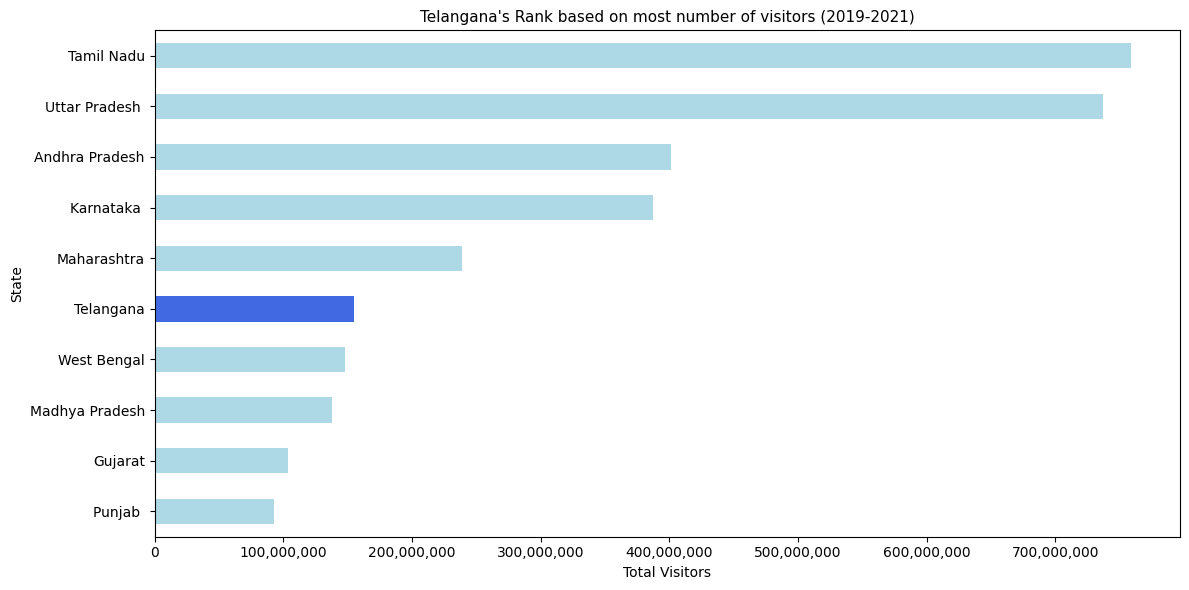

In [50]:
#plotting
def format_y_ticks(value, tick_number):
    return f'{value:,.0f}'

highlight_index = 5
colors = ['lightblue'] * len(all_rank)
colors[highlight_index] = 'royalblue'
    
fig, ax = plt.subplots(figsize=(12,6))

all_rank.plot(kind='barh',x='state',y='total', color=colors, ax=ax, legend=False)

ax.set_title("Telangana's Rank based on most number of visitors (2019-2021)", size=11)
ax.set_ylabel('State')
ax.set_xlabel('Total Visitors')
plt.xticks(rotation=0)
plt.gca().invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(format_y_ticks))

plt.tight_layout()
plt.show()

**(ii) What is Telangana's position in terms of domestic & foreign visitors in comparison to it's neighbouring states?**

In [51]:
#identifying neighbouring states with a list
neighbouring_states = ['Maharashtra','Andhra Pradesh','Chhattisgarh','Karnataka ','Telangana']

#filtering data of neighbouring states
df_neighbouring_states = other_states[other_states['state'].isin(neighbouring_states)]

In [52]:
#telangana's position in domestic vsitors list
dv_ns_rank = df_neighbouring_states[['state','total_domestic']].sort_values(by='total_domestic', ascending=False)
dv_ns_rank

,state,total_domestic
1,Andhra Pradesh,401157667
16,Karnataka,386721712
20,Maharashtra,232098532
32,Telangana,155033515
6,Chhattisgarh,24862150


In [53]:
#telangana's position in foreign vsitors list
fv_ns_rank = df_neighbouring_states[['state','total_foreign']].sort_values(by='total_foreign', ascending=False)
fv_ns_rank

,state,total_foreign
20,Maharashtra,6976756
16,Karnataka,846566
32,Telangana,375937
1,Andhra Pradesh,375498
6,Chhattisgarh,9147


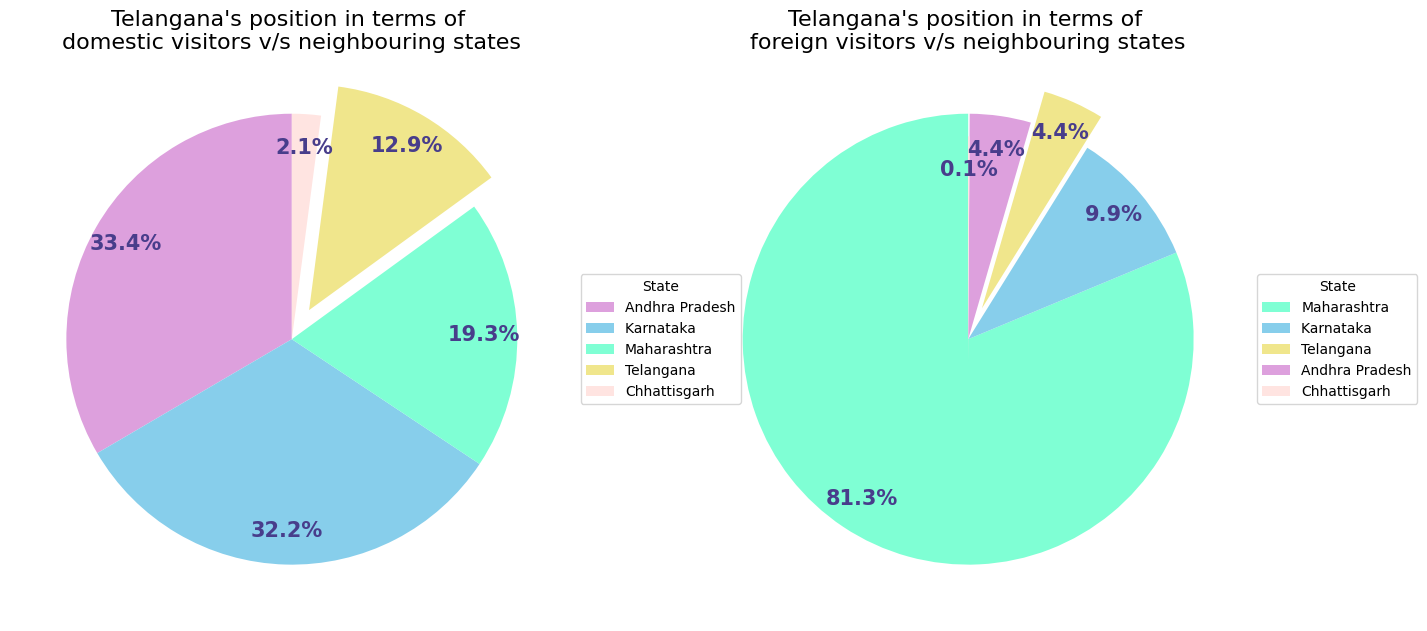

In [54]:
#plotting
color1 = ['plum','skyblue','aquamarine','khaki','mistyrose']
color2 = ['aquamarine','skyblue','khaki','plum','mistyrose']
explodeTuple1 = (0.0, 0.0, 0.0, 0.15, 0.0)
explodeTuple2 = (0.0, 0.0, 0.15, 0.0, -0.1)
labels_dv = dv_ns_rank['state']
labels_fv = fv_ns_rank['state']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

axes[0].pie(dv_ns_rank['total_domestic'], colors=color1, explode=explodeTuple1,
            autopct='%1.1f%%', pctdistance=0.85, startangle=90, textprops={'color': "darkslateblue", 'size': 15, 'weight': 'bold'})
axes[0].set_title("Telangana's position in terms of \ndomestic visitors v/s neighbouring states", size=16)
axes[0].legend(labels_dv, title="State", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot for foreign visitors
axes[1].pie(fv_ns_rank['total_foreign'], colors=color2, explode=explodeTuple2,
            autopct='%1.1f%%', pctdistance=0.85, startangle=90, textprops={'color': "darkslateblue", 'size': 15, 'weight': 'bold'})
axes[1].set_title("Telangana's position in terms of \nforeign visitors v/s neighbouring states", size=16)
axes[1].legend(labels_fv, title="State", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**12.		Provide recommendations that can boost the telangana tourism**

### Recommendations:

- **Promote Heritage Sites:**  
  Market iconic landmarks such as the Golconda Fort, Charminar, and the Qutb Shahi Tombs through digital platforms, travel agencies, and cultural events.

- **Cultural Festivals:**  
  Organize festivals showcasing Telangana's music, dance (like Perini Shivatandavam), and cuisine (Hyderabadi biryani and traditional sweets).

- **Wildlife and Nature Reserves:**  
  Develop eco-tourism initiatives in places like the Kawal Wildlife Sanctuary and Pocharam Wildlife Sanctuary.

- **Tourist Police:**  
  Establish dedicated tourist police units to ensure safety and provide assistance to visitors.
